In [28]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()


Loading BokehJS ...

In [11]:
# Loading the head of data

insta = pd.read_csv(r"C:\Users\Shashi\Downloads\instagram_reach.csv") 

In [12]:
# Checking the head of data

insta.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [13]:
# droping the columns

insta = insta.drop('Unnamed: 0', axis = 1)

In [14]:
insta = insta.drop('S.No', axis = 1)

In [15]:
insta = insta.iloc[:,1:2]

In [16]:
insta

,Caption
0,Who are #DataScientist and what do they do? >>...
1,We all know where it’s going. We just have to ...
2,Alexander Barinov: 4 years as CFO in multinati...
3,sfad
4,Ever missed a call while your phone was chargi...
...,...
95,"328 S. Wetherly Drive, Beverly Hills, CA 90212..."
96,Credit @tristankappel To find more dvlp follow...
97,We are coming up with the Best 21 Books that w...
98,We’re only paid to move dirt once. It’s not ju...


In [17]:
insta = pd.DataFrame(insta)

In [18]:
insta

,Caption
0,Who are #DataScientist and what do they do? >>...
1,We all know where it’s going. We just have to ...
2,Alexander Barinov: 4 years as CFO in multinati...
3,sfad
4,Ever missed a call while your phone was chargi...
...,...
95,"328 S. Wetherly Drive, Beverly Hills, CA 90212..."
96,Credit @tristankappel To find more dvlp follow...
97,We are coming up with the Best 21 Books that w...
98,We’re only paid to move dirt once. It’s not ju...


In [19]:
# Squeeze -> scalars

insta = insta.squeeze()

In [24]:
insta = insta.dropna()

In [25]:
# Lowercase text

series_lower = insta.apply(lambda x: x.lower())
print(series_lower)

0     who are #datascientist and what do they do? >>...
1     we all know where it’s going. we just have to ...
2     alexander barinov: 4 years as cfo in multinati...
3                                                  sfad
4     ever missed a call while your phone was chargi...
                            ...                        
95    328 s. wetherly drive, beverly hills, ca 90212...
96    credit @tristankappel to find more dvlp follow...
97    we are coming up with the best 21 books that w...
98    we’re only paid to move dirt once. it’s not ju...
99                      obtén tu tienda en línea ahora.
Name: Caption, Length: 94, dtype: object


In [26]:
# Removing Casefold

series_casefold = insta.apply(lambda x: x.casefold())
print(series_casefold)

0     who are #datascientist and what do they do? >>...
1     we all know where it’s going. we just have to ...
2     alexander barinov: 4 years as cfo in multinati...
3                                                  sfad
4     ever missed a call while your phone was chargi...
                            ...                        
95    328 s. wetherly drive, beverly hills, ca 90212...
96    credit @tristankappel to find more dvlp follow...
97    we are coming up with the best 21 books that w...
98    we’re only paid to move dirt once. it’s not ju...
99                      obtén tu tienda en línea ahora.
Name: Caption, Length: 94, dtype: object


In [30]:
# Removing punctuation

import string 
series_casefold = series_casefold.apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))

In [31]:
# Removing the numbers

series_casefold = series_casefold.apply(lambda x: x.translate(str.maketrans('','', string.digits)))

In [32]:
series_casefold 

0     who are datascientist and what do they do  mik...
1     we all know where it’s going we just have to w...
2     alexander barinov  years as cfo in multination...
3                                                  sfad
4     ever missed a call while your phone was chargi...
                            ...                        
95     s wetherly drive beverly hills ca  this beaut...
96    credit tristankappel to find more dvlp follow ...
97    we are coming up with the best  books that wil...
98    we’re only paid to move dirt once it’s not jus...
99                       obtén tu tienda en línea ahora
Name: Caption, Length: 94, dtype: object

In [33]:
# remove white spaces

series_casefold = series_casefold.str.strip()
print(series_casefold)

0     who are datascientist and what do they do  mik...
1     we all know where it’s going we just have to w...
2     alexander barinov  years as cfo in multination...
3                                                  sfad
4     ever missed a call while your phone was chargi...
                            ...                        
95    s wetherly drive beverly hills ca  this beauti...
96    credit tristankappel to find more dvlp follow ...
97    we are coming up with the best  books that wil...
98    we’re only paid to move dirt once it’s not jus...
99                       obtén tu tienda en línea ahora
Name: Caption, Length: 94, dtype: object


In [34]:
data = series_casefold

In [35]:
series_casefold

0     who are datascientist and what do they do  mik...
1     we all know where it’s going we just have to w...
2     alexander barinov  years as cfo in multination...
3                                                  sfad
4     ever missed a call while your phone was chargi...
                            ...                        
95    s wetherly drive beverly hills ca  this beauti...
96    credit tristankappel to find more dvlp follow ...
97    we are coming up with the best  books that wil...
98    we’re only paid to move dirt once it’s not jus...
99                       obtén tu tienda en línea ahora
Name: Caption, Length: 94, dtype: object

In [40]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shashi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
# Word Tokenizer

from nltk.tokenize import word_tokenize

token_data = [word_tokenize(word) for word in data]
print(token_data)

[['who', 'are', 'datascientist', 'and', 'what', 'do', 'they', 'do', 'mikequindazzi', 'machinelearning', 'ai', 'dataanalytics', 'datascienc', 'datalake', 'httpsbufflykymfs'], ['we', 'all', 'know', 'where', 'it', '’', 's', 'going', 'we', 'just', 'have', 'to', 'workresponsibly', 'to', 'postpone', 'the', 'date', 'this', 'actually', 'made', 'into', 'a', 'business', 'slide', 'deck', 'mac', 'macintoshsayhello', 'apple', 'stevejobs', 'ai', 'evolutionartificialintelligence', 'machinelearningterminator', 'illbeback', 'technologycomputerevolution', 'computersciencesciencefictioncomputersciencetosciencefictiontomorrowstechnology', 'vr', 'ar', 'robotrobots', 't', 'businessdeck', 'businessslidesillustration', 'sketches', 'drawing'], ['alexander', 'barinov', 'years', 'as', 'cfo', 'in', 'multinationals', 'over', 'years', 'of', 'experience', 'as', 'financial', 'advisory', 'in', 'deloitte', 'ey', 'of', 'them', 'as', 'a', 'partner', 'focused', 'on', 'strategic', 'management', 'finance', 'legal', 'and', '

In [42]:
# Sentence Tokenizer

from nltk.tokenize import sent_tokenize

sent_token = [sent_tokenize(doc) for doc in data]
print(sent_token)

[['who are datascientist and what do they do  mikequindazzi  machinelearning ai dataanalytics datascienc datalake  httpsbufflykymfs'], ['we all know where it’s going we just have to\xa0workresponsibly\xa0to postpone the date this actually made into a business slide\xa0deck\xa0mac\xa0macintoshsayhello\xa0apple\xa0stevejobs\xa0ai\xa0evolutionartificialintelligence\xa0machinelearningterminator\xa0illbeback\xa0technologycomputerevolution\xa0computersciencesciencefictioncomputersciencetosciencefictiontomorrowstechnology\xa0vr\xa0ar\xa0robotrobots\xa0t\xa0businessdeck\xa0businessslidesillustration\xa0sketches\xa0drawing'], ['alexander barinov  years as cfo in multinationals over  years of experience as financial advisory in deloitte  ey  of them as a partner focused on strategic management finance legal and compliance worked for the global corporations including publicly traded companies  years experience in trading at nyse and lse exchanges whoiswho\xa0aitrading\xa0ai\xa0aitradingteaminstat

In [43]:
# Punctuation Removal

import re

regex = re.compile('[%s]' % re.escape(string.punctuation))

tokenized_data_no_punctuation = []

for comments in token_data:
    new_comments = []
    for token in comments:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_comments.append(new_token)
            
    tokenized_data_no_punctuation.append(new_comments)
    
print(tokenized_data_no_punctuation)



[['who', 'are', 'datascientist', 'and', 'what', 'do', 'they', 'do', 'mikequindazzi', 'machinelearning', 'ai', 'dataanalytics', 'datascienc', 'datalake', 'httpsbufflykymfs'], ['we', 'all', 'know', 'where', 'it', '’', 's', 'going', 'we', 'just', 'have', 'to', 'workresponsibly', 'to', 'postpone', 'the', 'date', 'this', 'actually', 'made', 'into', 'a', 'business', 'slide', 'deck', 'mac', 'macintoshsayhello', 'apple', 'stevejobs', 'ai', 'evolutionartificialintelligence', 'machinelearningterminator', 'illbeback', 'technologycomputerevolution', 'computersciencesciencefictioncomputersciencetosciencefictiontomorrowstechnology', 'vr', 'ar', 'robotrobots', 't', 'businessdeck', 'businessslidesillustration', 'sketches', 'drawing'], ['alexander', 'barinov', 'years', 'as', 'cfo', 'in', 'multinationals', 'over', 'years', 'of', 'experience', 'as', 'financial', 'advisory', 'in', 'deloitte', 'ey', 'of', 'them', 'as', 'a', 'partner', 'focused', 'on', 'strategic', 'management', 'finance', 'legal', 'and', '

In [44]:
# Removing Stopwords

from nltk.corpus import stopwords

tokenized_data_no_stopwords = []

for docs in tokenized_data_no_punctuation:
    new_term_vector = []
    for word in docs:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
            
    tokenized_data_no_stopwords.append(new_term_vector)
    
print(tokenized_data_no_stopwords)

[['datascientist', 'mikequindazzi', 'machinelearning', 'ai', 'dataanalytics', 'datascienc', 'datalake', 'httpsbufflykymfs'], ['know', '’', 'going', 'workresponsibly', 'postpone', 'date', 'actually', 'made', 'business', 'slide', 'deck', 'mac', 'macintoshsayhello', 'apple', 'stevejobs', 'ai', 'evolutionartificialintelligence', 'machinelearningterminator', 'illbeback', 'technologycomputerevolution', 'computersciencesciencefictioncomputersciencetosciencefictiontomorrowstechnology', 'vr', 'ar', 'robotrobots', 'businessdeck', 'businessslidesillustration', 'sketches', 'drawing'], ['alexander', 'barinov', 'years', 'cfo', 'multinationals', 'years', 'experience', 'financial', 'advisory', 'deloitte', 'ey', 'partner', 'focused', 'strategic', 'management', 'finance', 'legal', 'compliance', 'worked', 'global', 'corporations', 'including', 'publicly', 'traded', 'companies', 'years', 'experience', 'trading', 'nyse', 'lse', 'exchanges', 'whoiswho', 'aitrading', 'ai', 'aitradingteaminstateam', 'instapeo

In [45]:
# Punctuation Removal

import re

regex = re.compile('[%s]' % re.escape(string.punctuation))

tokenized_data_no_punctuation = []

for comments in token_data:
    new_comments = []
    for token in comments:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_comments.append(new_token)
            
    tokenized_data_no_punctuation.append(new_comments)
    
print(tokenized_data_no_punctuation)



[['who', 'are', 'datascientist', 'and', 'what', 'do', 'they', 'do', 'mikequindazzi', 'machinelearning', 'ai', 'dataanalytics', 'datascienc', 'datalake', 'httpsbufflykymfs'], ['we', 'all', 'know', 'where', 'it', '’', 's', 'going', 'we', 'just', 'have', 'to', 'workresponsibly', 'to', 'postpone', 'the', 'date', 'this', 'actually', 'made', 'into', 'a', 'business', 'slide', 'deck', 'mac', 'macintoshsayhello', 'apple', 'stevejobs', 'ai', 'evolutionartificialintelligence', 'machinelearningterminator', 'illbeback', 'technologycomputerevolution', 'computersciencesciencefictioncomputersciencetosciencefictiontomorrowstechnology', 'vr', 'ar', 'robotrobots', 't', 'businessdeck', 'businessslidesillustration', 'sketches', 'drawing'], ['alexander', 'barinov', 'years', 'as', 'cfo', 'in', 'multinationals', 'over', 'years', 'of', 'experience', 'as', 'financial', 'advisory', 'in', 'deloitte', 'ey', 'of', 'them', 'as', 'a', 'partner', 'focused', 'on', 'strategic', 'management', 'finance', 'legal', 'and', '

In [46]:
# Stemming and Lemmatization

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
wordnet = WordNetLemmatizer()

preprocessed_docs = []

for docs in tokenized_data_no_stopwords:
    final_doc = []
    for word in docs:
        #final_doc.append(porter.stem(word))
        final_doc.append(wordnet.lemmatize(word))
        
    preprocessed_docs.append(final_doc)
    
print(preprocessed_docs)

[['datascientist', 'mikequindazzi', 'machinelearning', 'ai', 'dataanalytics', 'datascienc', 'datalake', 'httpsbufflykymfs'], ['know', '’', 'going', 'workresponsibly', 'postpone', 'date', 'actually', 'made', 'business', 'slide', 'deck', 'mac', 'macintoshsayhello', 'apple', 'stevejobs', 'ai', 'evolutionartificialintelligence', 'machinelearningterminator', 'illbeback', 'technologycomputerevolution', 'computersciencesciencefictioncomputersciencetosciencefictiontomorrowstechnology', 'vr', 'ar', 'robotrobots', 'businessdeck', 'businessslidesillustration', 'sketch', 'drawing'], ['alexander', 'barinov', 'year', 'cfo', 'multinationals', 'year', 'experience', 'financial', 'advisory', 'deloitte', 'ey', 'partner', 'focused', 'strategic', 'management', 'finance', 'legal', 'compliance', 'worked', 'global', 'corporation', 'including', 'publicly', 'traded', 'company', 'year', 'experience', 'trading', 'nyse', 'lse', 'exchange', 'whoiswho', 'aitrading', 'ai', 'aitradingteaminstateam', 'instapeople', 'ai

In [47]:
preprocessed_docs =  data

In [48]:
# POS Tagging 

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shashi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shashi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [49]:
tokens = nltk.word_tokenize(str(data))

In [50]:
tokens

['0',
 'who',
 'are',
 'datascientist',
 'and',
 'what',
 'do',
 'they',
 'do',
 'mik',
 '...',
 '1',
 'we',
 'all',
 'know',
 'where',
 'it',
 '’',
 's',
 'going',
 'we',
 'just',
 'have',
 'to',
 'w',
 '...',
 '2',
 'alexander',
 'barinov',
 'years',
 'as',
 'cfo',
 'in',
 'multination',
 '...',
 '3',
 'sfad',
 '4',
 'ever',
 'missed',
 'a',
 'call',
 'while',
 'your',
 'phone',
 'was',
 'chargi',
 '...',
 '...',
 '95',
 's',
 'wetherly',
 'drive',
 'beverly',
 'hills',
 'ca',
 'this',
 'beauti',
 '...',
 '96',
 'credit',
 'tristankappel',
 'to',
 'find',
 'more',
 'dvlp',
 'follow',
 '...',
 '97',
 'we',
 'are',
 'coming',
 'up',
 'with',
 'the',
 'best',
 'books',
 'that',
 'wil',
 '...',
 '98',
 'we',
 '’',
 're',
 'only',
 'paid',
 'to',
 'move',
 'dirt',
 'once',
 'it',
 '’',
 's',
 'not',
 'jus',
 '...',
 '99',
 'obtén',
 'tu',
 'tienda',
 'en',
 'línea',
 'ahora',
 'Name',
 ':',
 'Caption',
 ',',
 'Length',
 ':',
 '94',
 ',',
 'dtype',
 ':',
 'object']

In [51]:
tagged = nltk.pos_tag(tokens)


In [52]:
tagged

[('0', 'NNS'),
 ('who', 'WP'),
 ('are', 'VBP'),
 ('datascientist', 'JJ'),
 ('and', 'CC'),
 ('what', 'WP'),
 ('do', 'VBP'),
 ('they', 'PRP'),
 ('do', 'VB'),
 ('mik', 'NNS'),
 ('...', ':'),
 ('1', 'CD'),
 ('we', 'PRP'),
 ('all', 'DT'),
 ('know', 'VBP'),
 ('where', 'WRB'),
 ('it', 'PRP'),
 ('’', 'VBZ'),
 ('s', 'JJ'),
 ('going', 'VBG'),
 ('we', 'PRP'),
 ('just', 'RB'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('w', 'VB'),
 ('...', ':'),
 ('2', 'CD'),
 ('alexander', 'NN'),
 ('barinov', 'NN'),
 ('years', 'NNS'),
 ('as', 'IN'),
 ('cfo', 'NN'),
 ('in', 'IN'),
 ('multination', 'NN'),
 ('...', ':'),
 ('3', 'CD'),
 ('sfad', 'NN'),
 ('4', 'CD'),
 ('ever', 'RB'),
 ('missed', 'VBD'),
 ('a', 'DT'),
 ('call', 'NN'),
 ('while', 'IN'),
 ('your', 'PRP$'),
 ('phone', 'NN'),
 ('was', 'VBD'),
 ('chargi', 'NN'),
 ('...', ':'),
 ('...', ':'),
 ('95', 'CD'),
 ('s', 'JJ'),
 ('wetherly', 'RB'),
 ('drive', 'VBP'),
 ('beverly', 'RB'),
 ('hills', 'NNS'),
 ('ca', 'MD'),
 ('this', 'DT'),
 ('beauti', 'NN'),
 ('...', ':'),
 (

In [57]:
data

0     who are datascientist and what do they do  mik...
1     we all know where it’s going we just have to w...
2     alexander barinov  years as cfo in multination...
3                                                  sfad
4     ever missed a call while your phone was chargi...
                            ...                        
95    s wetherly drive beverly hills ca  this beauti...
96    credit tristankappel to find more dvlp follow ...
97    we are coming up with the best  books that wil...
98    we’re only paid to move dirt once it’s not jus...
99                       obtén tu tienda en línea ahora
Name: Caption, Length: 94, dtype: object

In [58]:
# NER - Named Entities Recognition 

import spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
 
FoundEntities=nlp(str(data))

for X in FoundEntities.ents:
    print([(X.text, X.label_)])

[('1', 'CARDINAL')]
[('2', 'CARDINAL')]
[('barinov  years', 'DATE')]
[('3', 'CARDINAL')]
[('4', 'CARDINAL')]
[('beverly hills', 'GPE')]
[('96', 'CARDINAL')]
[('97', 'CARDINAL')]
[('98', 'CARDINAL')]
[('99', 'CARDINAL')]
[('94', 'CARDINAL')]


In [59]:
# NORP - NAtionalities or religious or political groups
# GPE - Countries, cities, states
# ORG - Companies, agencies, institutions, etc

In [60]:
# LSA - LDA (Latent Semantic Analysis & Latent Dirichlet Allocation)

In [88]:
from sklearn.feature_extraction.text import CountVectorizer as CountVectorizer

small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = data.sample(n=10000, random_state=0, replace = True).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

Headline before vectorization: join the international community of forex trading and change your financial situation with knowledge on binary and forex trading grow your investment and smile tomorrow with such an investment of  your guaranteed of making  back as profit in a time frame of  days this is no scam or joke totally legitimate dm me now for more info on my trading platform
Headline after vectorization: 
  (0, 437)	1
  (0, 422)	1
  (0, 156)	1
  (0, 302)	2
  (0, 817)	3
  (0, 128)	1
  (0, 296)	1
  (0, 739)	1
  (0, 449)	1
  (0, 80)	1
  (0, 340)	1
  (0, 427)	2
  (0, 748)	1
  (0, 810)	1
  (0, 342)	1
  (0, 509)	1
  (0, 636)	1
  (0, 808)	1
  (0, 306)	1
  (0, 194)	1
  (0, 702)	1
  (0, 438)	1
  (0, 814)	1
  (0, 466)	1
  (0, 220)	1
  (0, 401)	1
  (0, 613)	1


In [89]:
n_topics = 8

In [90]:
# LSA

from sklearn.decomposition import TruncatedSVD

lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [91]:
keys = lsa_topic_matrix.argmax(axis=1).tolist()

In [92]:
keys

[3,
 5,
 0,
 3,
 3,
 0,
 6,
 2,
 0,
 0,
 5,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 2,
 0,
 5,
 3,
 0,
 3,
 0,
 0,
 0,
 6,
 5,
 4,
 5,
 0,
 0,
 0,
 0,
 2,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 6,
 7,
 0,
 0,
 3,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 5,
 6,
 0,
 4,
 4,
 2,
 0,
 6,
 4,
 0,
 0,
 5,
 0,
 0,
 2,
 0,
 5,
 0,
 0,
 2,
 4,
 2,
 0,
 3,
 0,
 6,
 0,
 5,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 3,
 0,
 5,
 0,
 0,
 0,
 5,
 0,
 6,
 0,
 0,
 3,
 0,
 2,
 2,
 3,
 2,
 2,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 6,
 0,
 3,
 0,
 2,
 0,
 5,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 1,
 6,
 0,
 2,
 0,
 6,
 6,
 2,
 2,
 2,
 0,
 3,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 6,
 0,
 6,
 5,
 0,
 3,
 5,
 0,
 4,
 3,
 0,
 0,
 3,
 3,
 2,
 5,
 2,
 2,
 2,
 0,
 6,
 0,
 5,
 6,
 5,
 0,
 5,
 0,
 6,
 0,
 0,
 2,
 2,
 4,
 0,
 0,
 0,
 2,
 4,
 0,
 6,
 0,
 4,
 3,
 0,
 2,
 3,
 0,
 2,
 3,
 0,
 0,
 5,
 5,
 0,
 5,
 0,
 0,
 0,
 0,
 2,
 3,
 0,
 0,
 6,
 6,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 3,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 6,
 2,
 6,
 0,
 0,
 6,
 6,


In [93]:
from collections import Counter

count_pairs = Counter(keys).items()
categories = [pair[0] for pair in count_pairs]
counts = [pair[1] for pair in count_pairs]
print(categories, counts)

[3, 5, 0, 6, 2, 4, 7, 1] [833, 1339, 4669, 1144, 1284, 408, 207, 116]


In [96]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

lsa_keys = get_keys(lsa_topic_matrix)


def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [97]:
 def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [98]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  ai new great world data mikequindazzi today help beautiful blockchain
Topic 2:  visualised global warming zuidas forex football follow focused flow firsthand
Topic 3:  artificial intelligence robots services tasks create campus today career experiments
Topic 4:  trading operators paid just good dm time investment forex pocas
Topic 5:  tv just apple phone ai workthroughit programmer average day march
Topic 6:  stay books attacks public try tuned agree best life follow
Topic 7:  sell fa walking like mckinnon data rig peter character perfect
Topic 8:  traditional positive soon instagram ensure snapchat benefits roi measures said


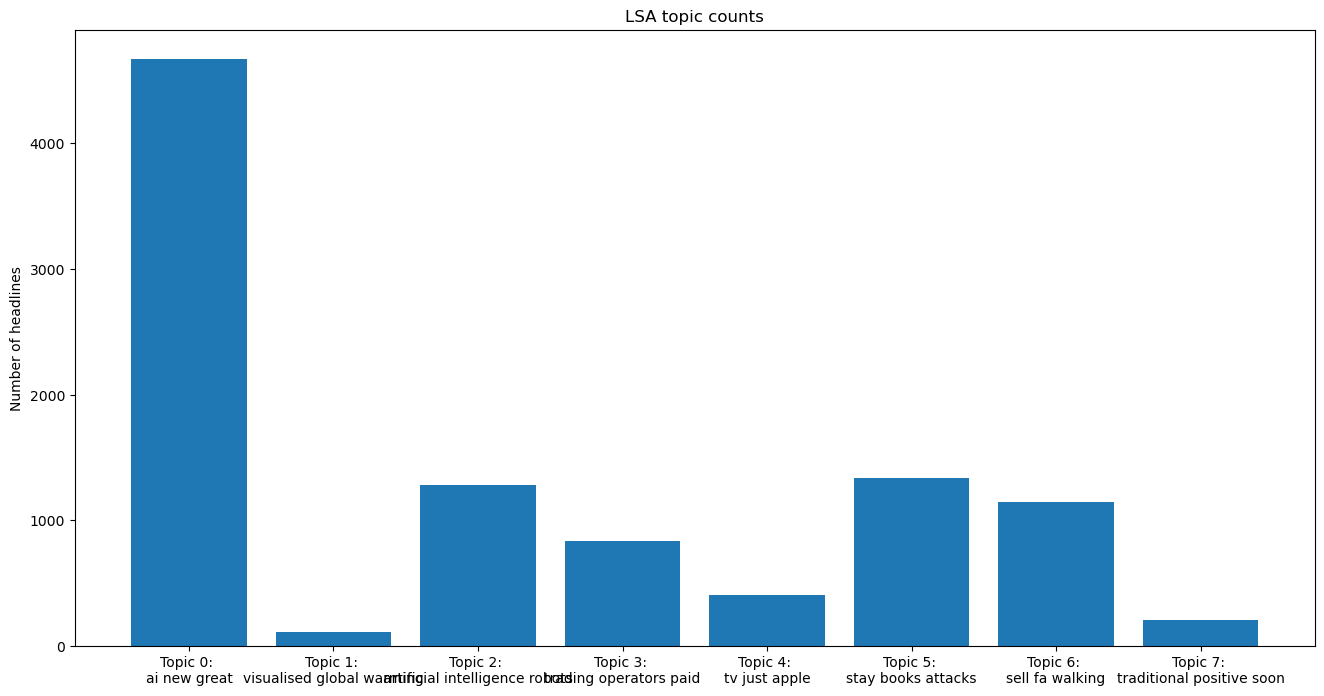

In [99]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.show()

In [100]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

C:\Users\Shashi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.023s...
[t-SNE] Computed neighbors for 10000 samples in 0.573s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.856331
[t-SNE] KL divergence after 2000 iterations: -2.316047


In [101]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [102]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [103]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

In [104]:
# LDA 

lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [105]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [106]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  create stay books follow attacks public try tuned life bio
Topic 2:  ai data paid operators apply just don traditional lead kettle
Topic 3:  new artificial intelligence beautiful trying im hardware electronics experiments simple
Topic 4:  based apple tv best online archive depicts epfl infoscience authors
Topic 5:  world help tasks iota agree democratize ai mikequindazzi billion qualcomm
Topic 6:  ai machinelearning bigdata career industry booming world mikequindazzi just fun
Topic 7:  today new artificial follow music art phone services career think
Topic 8:  trading years sell fa global investment forex en making financial


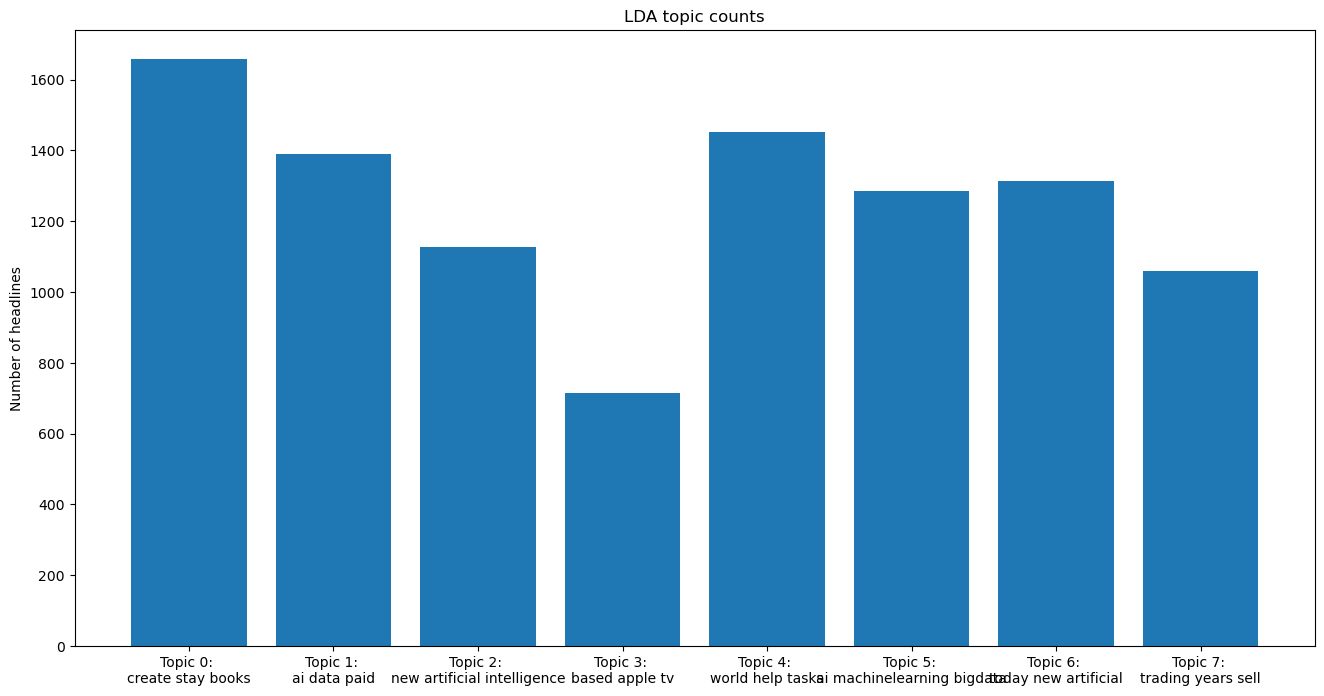

In [107]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');

In [108]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

C:\Users\Shashi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.050s...
[t-SNE] Computed neighbors for 10000 samples in 1.385s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.878044
[t-SNE] KL divergence after 2000 iterations: -2.497524


In [109]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)